# u7280249 Assignment 3 ASTR4004

## Task 1

### Part 1

The following is the code I used to establish the git repository. This `.ipynb` file itself is also in the repository.

```
echo "Hello World!" >> README.md
git init
git add *
git commit -m "Here is some code"
git remote add origin git@github.com:Olivex727/olivia-astr4004-ass3.git
git branch -M main
git push --set-upstream origin main
```

### Part 2

Note that the 5th command only works onmy device due to SSH permissions. The repository is available here: [https://github.com/Olivex727/olivia-astr4004-ass3](https://github.com/Olivex727/olivia-astr4004-ass3). The next step is to add content and commit it:

```
git checkout -b hello-again
echo "Hello Again!" >> README.md
git add *
git commit -m "Hello again"
git push --set-upstream origin hello-again
```

### Part 3

To merge branches we simply:

```
git checkout main
git merge hello-again
git branch -d hello-again
git push --all origin
```

I did not actually run the 3rd command as it would delete the branch, removing the artifact behind. However GitHub automatically deletes a branch after merger (it is toggleable). This should be enough for the excersise. I will be committing the rest of these excersises on a seperate branch and merge again.

## Task 2

### Part 1

For part 1 the ADQL query can be called directly on the Gaia website or using the astroquery module, here's the query:

In [1]:
from astroquery.gaia import Gaia
import numpy as np

In [2]:
query = f"""
-- Select Gaia DR3 and 2MASS data, specifically the values we need to answer this question
SELECT gaia.source_id, gaia.ra, gaia.dec, gaia.phot_g_mean_mag, gaia.parallax, gaia.bp_rp, tmass.j_m, tmass.ks_m, tmass.ph_qual, tmass.designation
FROM gaiadr3.gaia_source AS gaia

-- Use the single cross-match as shown in lectures (there's really not much I can change from what is provided on Gaia's website)
JOIN gaiaedr3.tmass_psc_xsc_best_neighbour AS xmatch USING (source_id)
JOIN gaiaedr3.tmass_psc_xsc_join AS xjoin
   ON xmatch.original_ext_source_id = xjoin.original_psc_source_id
JOIN gaiadr1.tmass_original_valid AS tmass
   ON xjoin.original_psc_source_id = tmass.designation

-- Isolate the desired parameters
WHERE
    gaia.phot_g_mean_mag < 14 AND
    DISTANCE(POINT('ICRS', gaia.ra, gaia.dec), POINT('ICRS', 132.825, 11.8)) < 1
"""

# Upload the source_id table for crossmatching
job = Gaia.launch_job_async(query=query)
gaiadr3_match = job.get_results()

gaiadr3_match

INFO: Query finished. [astroquery.utils.tap.core]


SOURCE_ID,ra,dec,phot_g_mean_mag,parallax,bp_rp,j_m,ks_m,ph_qual,designation
,deg,deg,mag,mas,mag,mag,mag,,
int64,float64,float64,float32,float64,float32,float32,float32,object,object
608020176290124544,132.1646618883753,12.54693864090943,5.63165,2.690376957952657,2.4299536,3.036,1.903,DCD,08483954+1232489
598677041873269888,132.98471168386044,11.135822334712053,7.1276755,2.957272390834695,1.3400488,5.394,4.686,ADA,08515632+1108091
604920240695111424,132.95558297375214,11.89417916328316,7.543855,3.4395394445433713,1.2504802,5.889,5.232,AAA,08514935+1153388
604992258706635520,132.39087730250452,12.170842774554602,7.6000934,16.694126797894192,0.67128706,6.723,6.467,AAA,08493387+1210146
604684326730942592,133.12692088532611,11.258976562554766,7.9480596,1.1630593472821595,2.1596684,5.392,4.364,EEE,08523047+1115323
598949304144504448,132.07497295248402,11.583996462974458,8.11953,2.869466983909209,1.1354628,6.648,6.051,AAA,08481801+1135025
604997202213330560,132.86371938949912,12.127791998043406,8.157011,5.622660195526254,0.49772835,7.285,7.086,AAA,08512734+1207406
598878424300068352,132.47998197025302,11.252778942347105,8.21223,2.4558152309639096,1.1176262,6.767,6.17,AAA,08495521+1115102


### Part 2

Showing the table above already satisfies the question, that there are 1018 entries, however here's a hardcoding of the answer:

In [47]:
print("Amount of Stars: "+str(len(gaiadr3_match)))

Amount of Stars: 1018


### Part 3

We can make a mask and count the number of true values in the mask.

In [59]:
tmass_mask = gaiadr3_match["ph_qual"] != 'AAA'

print("No. of Low-Quality 2MASS Stars: " + str(np.sum(tmass_mask)))

gaiadr3_match[tmass_mask]

No. of Low-Quality 2MASS Stars: 21


SOURCE_ID,ra,dec,phot_g_mean_mag,parallax,bp_rp,j_m,ks_m,ph_qual,designation
,deg,deg,mag,mas,mag,mag,mag,,
int64,float64,float64,float32,float64,float32,float32,float32,object,object
608020176290124544,132.1646618883753,12.54693864090943,5.63165,2.690376957952657,2.4299536,3.036,1.903,DCD,08483954+1232489
598677041873269888,132.98471168386044,11.135822334712053,7.1276755,2.957272390834695,1.3400488,5.394,4.686,ADA,08515632+1108091
604684326730942592,133.12692088532611,11.258976562554766,7.9480596,1.1630593472821595,2.1596684,5.392,4.364,EEE,08523047+1115323
605101037342309376,133.25384248975615,12.370193849409716,9.322637,1.6012014288815182,1.112257,7.883,7.31,AAE,08530092+1222124
598689102141448320,132.9215946592312,11.161628869508299,9.365868,7.44466758861682,0.7221241,8.608,8.115,UAA,08514117+1109421
598955115237068032,132.48669417880745,11.692484141091276,9.409208,1.1905377048633794,1.4588013,7.542,6.693,AAF,08495682+1141329
604950271106216064,133.00959830473363,12.08749464157222,10.553087,0.6536709234487615,1.3552113,8.843,8.079,AAF,08520230+1205150
604911268507711232,132.8097517211022,11.750135043124263,10.977456,1.251831791627078,0.58271503,10.081,9.918,EEE,08511436+1145005


### Part 4

We can do the same as above

In [60]:
parax_mask = gaiadr3_match["parallax"] <= 0

print("No. of Bad-Parallax Stars:      " + str(np.sum(parax_mask)))

gaiadr3_match[parax_mask]

No. of Bad-Parallax Stars:      2


SOURCE_ID,ra,dec,phot_g_mean_mag,parallax,bp_rp,j_m,ks_m,ph_qual,designation
,deg,deg,mag,mas,mag,mag,mag,,
int64,float64,float64,float32,float64,float32,float32,float32,object,object
604918282190043648,132.89017067428628,11.862498376939232,13.116055,-0.12074027232455467,0.80105686,12.026,11.652,AAA,08513364+1151449
598847569256078464,132.41064947639805,11.033372831460598,13.549349,-0.16481842755765533,1.0036774,12.178,11.643,AAA,08493856+1102000


### Part 5

We can filter out our data using the masks we made. Since both bad-parallax stars are AAA quality, masking should remove 21 + 2 = 23 entries. Giving 995 entries in total.

In [62]:
gaiadr3_cut = gaiadr3_match[~tmass_mask]

# We need to define a new mask to fit the new table size
parax_mask = gaiadr3_cut["parallax"] <= 0

gaiadr3_cut = gaiadr3_cut[~parax_mask]

print("No. of Quality Stars: "+str(len(gaiadr3_cut)))

gaiadr3_cut

No. of Quality Stars: 995


SOURCE_ID,ra,dec,phot_g_mean_mag,parallax,bp_rp,j_m,ks_m,ph_qual,designation
,deg,deg,mag,mas,mag,mag,mag,,
int64,float64,float64,float32,float64,float32,float32,float32,object,object
604920240695111424,132.95558297375214,11.89417916328316,7.543855,3.4395394445433713,1.2504802,5.889,5.232,AAA,08514935+1153388
604992258706635520,132.39087730250452,12.170842774554602,7.6000934,16.694126797894192,0.67128706,6.723,6.467,AAA,08493387+1210146
598949304144504448,132.07497295248402,11.583996462974458,8.11953,2.869466983909209,1.1354628,6.648,6.051,AAA,08481801+1135025
604997202213330560,132.86371938949912,12.127791998043406,8.157011,5.622660195526254,0.49772835,7.285,7.086,AAA,08512734+1207406
598878424300068352,132.47998197025302,11.252778942347105,8.21223,2.4558152309639096,1.1176262,6.767,6.17,AAA,08495521+1115102
601999250616455168,131.8983060301823,12.17069243211625,8.218385,1.5435949287383588,1.4184194,6.391,5.612,AAA,08473559+1210146
604962193935568896,132.55120535653674,11.856791616775809,8.222472,1.1811350509906289,1.8043594,6.01,5.02,AAA,08501230+1151246
598887594054812288,132.57755317060142,11.407827304973624,8.447178,1.8642634783410874,1.2570438,6.8,6.129,AAA,08501862+1124283


### Parts 6 & 7

In [68]:
import matplotlib.pyplot as plt

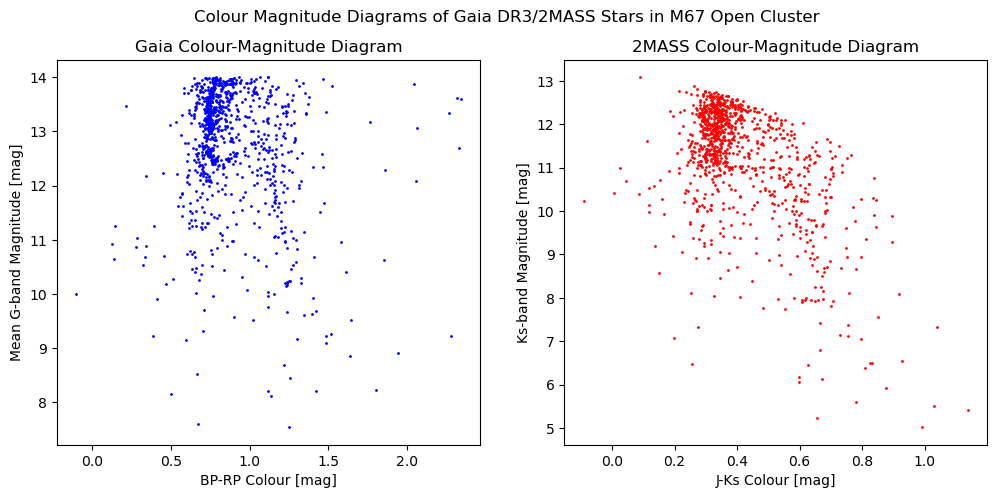

In [86]:
# Define figure
fig, [ax1, ax2]= plt.subplots(1, 2)

# Set big parameters
fig.set_size_inches(12, 5)
fig.suptitle("Colour Magnitude Diagrams of Gaia DR3/2MASS Stars in M67 Open Cluster")

# Gaia Colours
ax1.set_title("Gaia Colour-Magnitude Diagram")
ax1.plot(gaiadr3_cut["bp_rp"], gaiadr3_cut["phot_g_mean_mag"], 'bo', markersize=1)
ax1.set_xlabel("BP-RP Colour [mag]")
ax1.set_ylabel("Mean G-band Magnitude [mag]")

# 2MASS Colours
ax2.set_title("2MASS Colour-Magnitude Diagram")
ax2.plot(gaiadr3_cut["j_m"]-gaiadr3_cut["ks_m"], gaiadr3_cut["ks_m"], 'ro', markersize=1)
ax2.set_xlabel("J-Ks Colour [mag]")
ax2.set_ylabel("Ks-band Magnitude [mag]")

# Save and Show Figure
plt.savefig("./figures/cmds_M67.png", dpi=200)
plt.show()

### Part 8

The HERMES 2dF spectrograph can measure all of the optical and near-IR at 471.5 - 788.7 nm (just to confirm that this is the correct intstrument to use). So, observing these stars, which appear to have decent presence in both the optical (BP-RP) and infrared (J-Ks) can be done with HERMES. There also seems to be plenty of stars below a G-band magnitude of 14, however, most of these stars barely meet the threshold at 12-14 mag. So they should expect some interference, which is very common in astronomy.

tl;dr I think it's a perfectly valid project to undertake.

## Task 3

### Part 1 & 2

We can't really seperate out these two parts, as the linear fit is required for the graphing. I used `np.polyfit` linear fitting, which uses least squares.

In [11]:
from astropy.io import fits
from pandas import DataFrame as df
import numpy as np
from matplotlib import pyplot as plt, colors

# Import the FITS data
hdu = fits.open("./data/nihao_uhd_simulation_g8.26e11_xyz_positions_and_oxygen_ao.fits")
data = df.from_records(hdu[1].data)
hdu.close()

data

,x,y,z,A_O
0,10.020546,-15.421509,-3.241711,8.428943
1,-13.487837,5.663507,-0.802306,8.671107
2,6.642289,-0.138942,-0.585961,8.891596
3,0.203939,4.112373,-0.147622,8.977195
4,-20.824045,6.971037,-1.758061,8.326950
...,...,...,...,...
511515,1.533189,0.998079,0.217088,9.102036
511516,1.532199,0.998165,0.216980,9.102036
511517,1.698204,-1.207707,0.121088,9.081205
511518,1.698204,-1.206664,0.121917,9.081205


In [2]:
# Get the data into a nice set of arrays
R_gal = np.sqrt(data['x'] ** 2 + data['y'] ** 2)
a_O = data["A_O"]

# Linear fit with mx + b
[m, b], [[m_v, _], [_, b_v]] = np.polyfit(R_gal, a_O, 1, cov=True)
[m_u, b_u] = np.sqrt(np.array([m_v, b_v]))
print("Linear Fit of R_gal to A(O): m=%.3g+/-%.2g, b=%.3g+/-%.2g" % (m, m_u, b, b_u))

# Create residuals of A(O)
da_O = a_O - (m * R_gal + b)

Linear Fit of R_gal to A(O): m=-0.0342+/-1.5e-05, b=9.13+/-0.00023


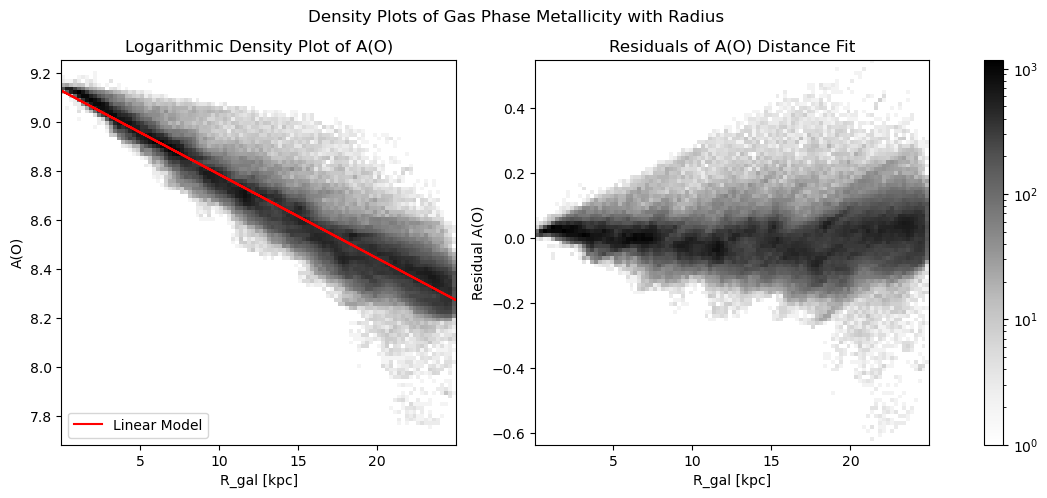

In [63]:
# Plot the data

# Define figure
fig, ax = plt.subplots(1, 2)
[ax1, ax2] = ax

# Set big parameters
fig.set_size_inches(14, 5)
fig.suptitle("Density Plots of Gas Phase Metallicity with Radius", x=0.45)

# Define a nice colour map (black and white is both paper and eyeball friendly)
cmap = 'Greys'

# Log density plot
ax1.set_title("Logarithmic Density Plot of A(O)")
_, _, _, cim = ax1.hist2d(R_gal, a_O, bins=100, cmap=cmap, norm=colors.LogNorm())
ax1.plot(R_gal, m*R_gal+b, 'r', label="Linear Model")
ax1.set_xlabel("R_gal [kpc]")
ax1.set_ylabel("A(O)")
ax1.legend(loc='lower left')

# Residuals plot
ax2.set_title("Residuals of A(O) Distance Fit")
#ax2.plot(R_gal, da_O, 'bo', markersize=1)
_, _, _, cim = ax2.hist2d(R_gal, da_O, bins=100, cmap=cmap, norm=colors.LogNorm())
ax2.set_xlabel("R_gal [kpc]")
ax2.set_ylabel("Residual A(O)")

# Add universal colourbar - matplotlib will ensure both follow the same scaling regime
fig.colorbar(cim, ax=ax.ravel().tolist())

# Save and Show Figure
plt.savefig("./figures/gas_phase_metallicity_1.png", dpi=200)
plt.show()

### Part 3

From above, the linear model fits quite well, at least by eye. It certainly isn't awful. However on closer inspection it does appear that the model tends to under-estimate the gas-phase metallicity values (especially closer to the galactic centre). This is because there are some particularly low A(O) values further out, influencing the gradient/intercept downward.

We can do some statistical tests to quantify the goodness-of-fit. The $R^2$ value is a good measure of the data's overall correlation, and the $\chi^2$ value is a good measure of goodness-of-fit. We can quantify how the scatter in the data affects the fit using a travelling average and standard deviation.

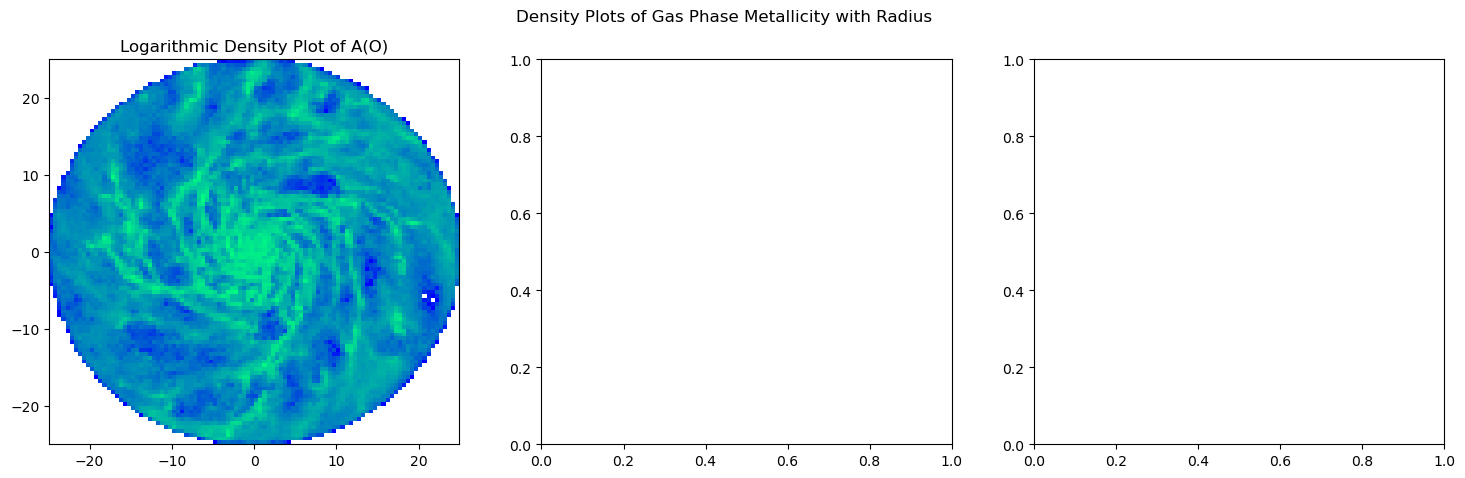

In [22]:
xs = data['x']
ys = data['y']

# Plot the data

# Define figure
fig, ax = plt.subplots(1, 3)
[ax1, ax2, ax3] = ax

# Set big parameters
fig.set_size_inches(18, 5)
fig.suptitle("Density Plots of Gas Phase Metallicity with Radius")

# Define a nice colour map
# I think winter is the most colourblind-friendly (I checked online) that isn't just boring greyscale
cmap = 'winter'

# Log density plot
ax1.set_title("Logarithmic Density Plot of A(O)")
ax1.hist2d(xs, ys, bins=100, cmap=cmap, norm=colors.LogNorm())

# Save and Show Figure
plt.savefig("./figures/gas_phase_metallicity_2.png", dpi=200)
plt.show()

### Part 4

Plotting the colourmaps.

### Part 5

Choice

### Part 6

Reesiduals?